# Aerogel Bonding AI & ML Project 2024
## Importing Libraries & Reading Data

In [25]:
#Importing Libraries 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Reading Data Set
path = './aerogel_bonding.csv'
df = pd.read_csv(path)

## EDA & Data Pre-Processing
Here we will visualize the data, take into account important values and clean the dataset from irrelevant data

### Vizualising and Understaning Data Structure & Values

In [26]:
pd.set_option('display.max_columns', None) # View all columns
df.head()

,HolidaysTaken,PercentageOfCompletedTasks,CurrentJobDuration,RecentHolidaysTaken,RequestedProcessAmount,JobStatus,BondingRiskRating,TotalMaterialProcessed,ByproductRation,working_skills,CivilStatus,dependability,MistakesLastYear,HighestEducationAttained,BondingSuccessful,ChurnRisk,ProcessedKilograms,SkillRating,ProcessingTimestamp,WorkExperience,HistoricalBehavior,TotalMaterialToProcess,WorkHistoryDuration,ApplicantAge,PriorExecutionDefaults,DifferentTasksCompleted,TotalChurnRisk,OtherCompaniesMaterialProcessed,BondingPeriod,trustability,MonthlyExecutions
0,4.0,NaN,6.0,1.0,51172.0,Employed,46.0,300388.0,0.273137,1.244120,Married,2.798099,0.0,Master,0.0,0.223172,44305.0,606.0,2055-07-29,48.0,23.0,14193.0,3.0,67.0,0.0,NaN,NaN,NaN,24.0,3.144274,440.0
1,1.0,0.323046,4.0,0.0,11246.0,Employed,54.0,299914.0,0.450387,2.228183,Married,2.586440,0.0,Bachelor,NaN,0.215746,NaN,561.0,2072-03-10,31.0,17.0,85355.0,28.0,52.0,NaN,0.0,0.232582,214559.0,36.0,3.704809,NaN
2,5.0,0.491574,3.0,1.0,14075.0,Employed,42.4,74687.0,0.325027,2.699264,Married,1.949641,0.0,Bachelor,1.0,0.256075,67954.0,NaN,2032-01-24,20.0,25.0,14006.0,NaN,45.0,0.0,0.0,0.240812,60681.0,60.0,2.427195,171.0
3,4.0,0.108916,3.0,1.0,18957.0,Employed,40.8,47866.0,NaN,0.445854,Married,1.569581,0.0,Bachelor,1.0,0.240457,98184.0,607.0,2029-11-12,19.0,32.0,13240.0,16.0,42.0,0.0,4.0,0.231520,34626.0,84.0,1.156431,212.0
4,NaN,0.174628,1.0,2.0,17902.0,Employed,51.0,18181.0,0.388317,1.940075,Single,2.149917,NaN,Associate,NaN,0.206902,48981.0,612.0,2031-08-22,28.0,14.0,44217.0,28.0,50.0,0.0,0.0,0.214425,4812.0,48.0,3.185402,323.0


### Evaluation on dataset features

- **HolidaysTaken:** Integer of days taken for holiday by the worker, it can be NaN if the worker didn't take any days off, same as it would be for 0, it wouldn't affect any calculations, only rows with negative numbers if found should be excluded.
- **PercentageOfCompletedTasks:** Float between 0 and 1, representing percentage(divided by 100) of completed tasks by worker, it can be NaN in case someone hasn't completed any given task, or in case it hasn't been assigned any work
- **CurrentJobDuration:** Integer representing number of months worker has been working there, in case of NaN, negative or 0, row should be excluded.
- **RecentHolidaysTaken:** Integer of days taken for recent holiday, it should be smaller or equal to HolidaysTaken, otherwise row should be excluded.
- **RequestedProcessAmount:** Integer of amount of material requested for bonding process, NaN and anything smaller than 0 should be excluded.
- **JobStatus:** Enum for status of worker, in order to represent it we will be using One-Hot Encoding as we don't want to impose any ordering between categories, additionally it wouldn't impose big issues regarding memory usage as our dataset is not so big and we just have three categories, which makes it very suitable for this problem. Additionally, all NaNs should be excluded.
- **BondingRiskRating:** Float between 0 and 100, indicating percentage associated to risk between bonding using certain materials or processes, NaNs can be used as zeros, anything out of range 0-100 should be consider as error and excluded.
- **TotalMaterialProcessed:** Integer representing cumulative amount of materials used by worker or team of workers through bonding processes, zeros and negatives should be excluded.
- **ByproductRation:** Float between 0 and 1, representing percentage(divided by 100) of byproducts generated bonding relative to total number of materials used, anything out of range or NaNs can be excluded.
- **working_skills:** Float between 0 and 5, representing rating of a worker's skills, 
- **CivilStatus:** 
- **dependability:**

In [27]:
df.dtypes

HolidaysTaken                      float64
PercentageOfCompletedTasks         float64
CurrentJobDuration                 float64
RecentHolidaysTaken                float64
RequestedProcessAmount             float64
JobStatus                           object
BondingRiskRating                  float64
TotalMaterialProcessed             float64
ByproductRation                    float64
working_skills                     float64
CivilStatus                         object
dependability                      float64
MistakesLastYear                   float64
HighestEducationAttained            object
BondingSuccessful                  float64
ChurnRisk                          float64
ProcessedKilograms                 float64
SkillRating                        float64
ProcessingTimestamp                 object
WorkExperience                     float64
HistoricalBehavior                 float64
TotalMaterialToProcess             float64
WorkHistoryDuration                float64
ApplicantAg

### Checking Data Integrity

In [28]:
# Configure pandas to display the entire table without line breaks
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)       # Set the width to prevent line breaks

# Calculate missing values
missing_values = df.isnull().sum()

# Calculate total values (missing + non-missing)
total_values = df.shape[0]  # Total rows in the DataFrame

# Calculate percentage of missing values and format with percentage sign
percentage_missing = (missing_values / total_values * 100).apply(lambda x: f'{x:.2f}%')

# Add data types
data_types = df.dtypes

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Data Type': data_types,
    'Missing Values': missing_values,
    'Total Values': total_values,
    'Percentage Missing': percentage_missing,
})

# Sort by Missing Values
summary_df.sort_values(by='Missing Values', ascending=False, inplace=True)

# Print the summary
print("Summary:")
print(summary_df)

# Reset pandas options after printing if needed
pd.reset_option('display.max_columns')
pd.reset_option('display.width')


Summary:
                                Data Type  Missing Values  Total Values Percentage Missing
RequestedProcessAmount            float64            2075         20000             10.38%
ChurnRisk                         float64            2072         20000             10.36%
ApplicantAge                      float64            2068         20000             10.34%
HighestEducationAttained           object            2063         20000             10.32%
PriorExecutionDefaults            float64            2055         20000             10.27%
BondingRiskRating                 float64            2050         20000             10.25%
CurrentJobDuration                float64            2048         20000             10.24%
PercentageOfCompletedTasks        float64            2045         20000             10.22%
BondingPeriod                     float64            2044         20000             10.22%
TotalMaterialProcessed            float64            2043         20000          

In [29]:
#MAYBE DO SHORTER


# Calculate the number of duplicate rows
duplicates = df.duplicated().sum()

# Calculate percentage of duplicates
total_rows = df.shape[0]
percentage_duplicates = (duplicates / total_rows) * 100

# Print summary of duplicates
print(f"Total duplicate rows: {duplicates}")
print(f"Percentage of duplicates: {percentage_duplicates:.2f}%")

# Optionally display the duplicate rows
if duplicates > 0:
    print("Duplicate rows:")
    print(df[df.duplicated()])
else:
    print("No duplicate rows found.")


Total duplicate rows: 0
Percentage of duplicates: 0.00%
No duplicate rows found.


In [30]:
# Columns identified as irrelevant
columns_to_drop = [
    'HolidaysTaken', 
    'RecentHolidaysTaken', 
    'JobStatus', 
    'CivilStatus', 
    'HighestEducationAttained', #very very small
    'ChurnRisk', #very small
    'ProcessingTimestamp', #medium 
    'ApplicantAge', #reduntant we have work experience
    'WorkHistoryDuration', #reduntant we have work experience
    'TotalChurnRisk', #we have churn risk ???
    'OtherCompaniesMaterialProcessed' #???
]

# Drop irrelevant columns
df = df.drop(columns=columns_to_drop, errors='ignore')

# Drop rows with missing values
df = df.dropna()

# Display summary after dropping
print("Updated DataFrame Info:")
print(df.info())


Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 2466 entries, 8 to 19992
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PercentageOfCompletedTasks  2466 non-null   float64
 1   CurrentJobDuration          2466 non-null   float64
 2   RequestedProcessAmount      2466 non-null   float64
 3   BondingRiskRating           2466 non-null   float64
 4   TotalMaterialProcessed      2466 non-null   float64
 5   ByproductRation             2466 non-null   float64
 6   working_skills              2466 non-null   float64
 7   dependability               2466 non-null   float64
 8   MistakesLastYear            2466 non-null   float64
 9   BondingSuccessful           2466 non-null   float64
 10  ProcessedKilograms          2466 non-null   float64
 11  SkillRating                 2466 non-null   float64
 12  WorkExperience              2466 non-null   float64
 13  HistoricalBeh

In [31]:
print(df.isnull().sum())

PercentageOfCompletedTasks    0
CurrentJobDuration            0
RequestedProcessAmount        0
BondingRiskRating             0
TotalMaterialProcessed        0
ByproductRation               0
working_skills                0
dependability                 0
MistakesLastYear              0
BondingSuccessful             0
ProcessedKilograms            0
SkillRating                   0
WorkExperience                0
HistoricalBehavior            0
TotalMaterialToProcess        0
PriorExecutionDefaults        0
DifferentTasksCompleted       0
BondingPeriod                 0
trustability                  0
MonthlyExecutions             0
dtype: int64


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PercentageOfCompletedTasks,2466.0,0.286052,0.158863,0.007499,0.159582,0.263743,0.388892,8.785645e-01
CurrentJobDuration,2466.0,4.993917,2.247280,0.000000,3.000000,5.000000,6.000000,1.400000e+01
RequestedProcessAmount,2466.0,24807.404704,13538.093008,4070.000000,15362.500000,21715.000000,30958.000000,1.279450e+05
BondingRiskRating,2466.0,50.825872,7.702123,28.800000,46.000000,52.000000,56.000000,7.700000e+01
TotalMaterialProcessed,2466.0,92017.532847,108994.744387,2370.000000,29931.500000,57862.500000,111197.750000,1.280716e+06
ByproductRation,2466.0,0.284929,0.156439,0.002016,0.166228,0.268185,0.385273,8.160544e-01
working_skills,2466.0,2.389820,1.003055,0.000000,1.699318,2.418257,3.072251,5.000000e+00
dependability,2466.0,2.356150,0.979328,0.000000,1.681227,2.356454,3.036468,5.000000e+00
MistakesLastYear,2466.0,0.051906,0.221882,0.000000,0.000000,0.000000,0.000000,1.000000e+00
BondingSuccessful,2466.0,0.236821,0.425218,0.000000,0.000000,0.000000,0.000000,1.000000e+00


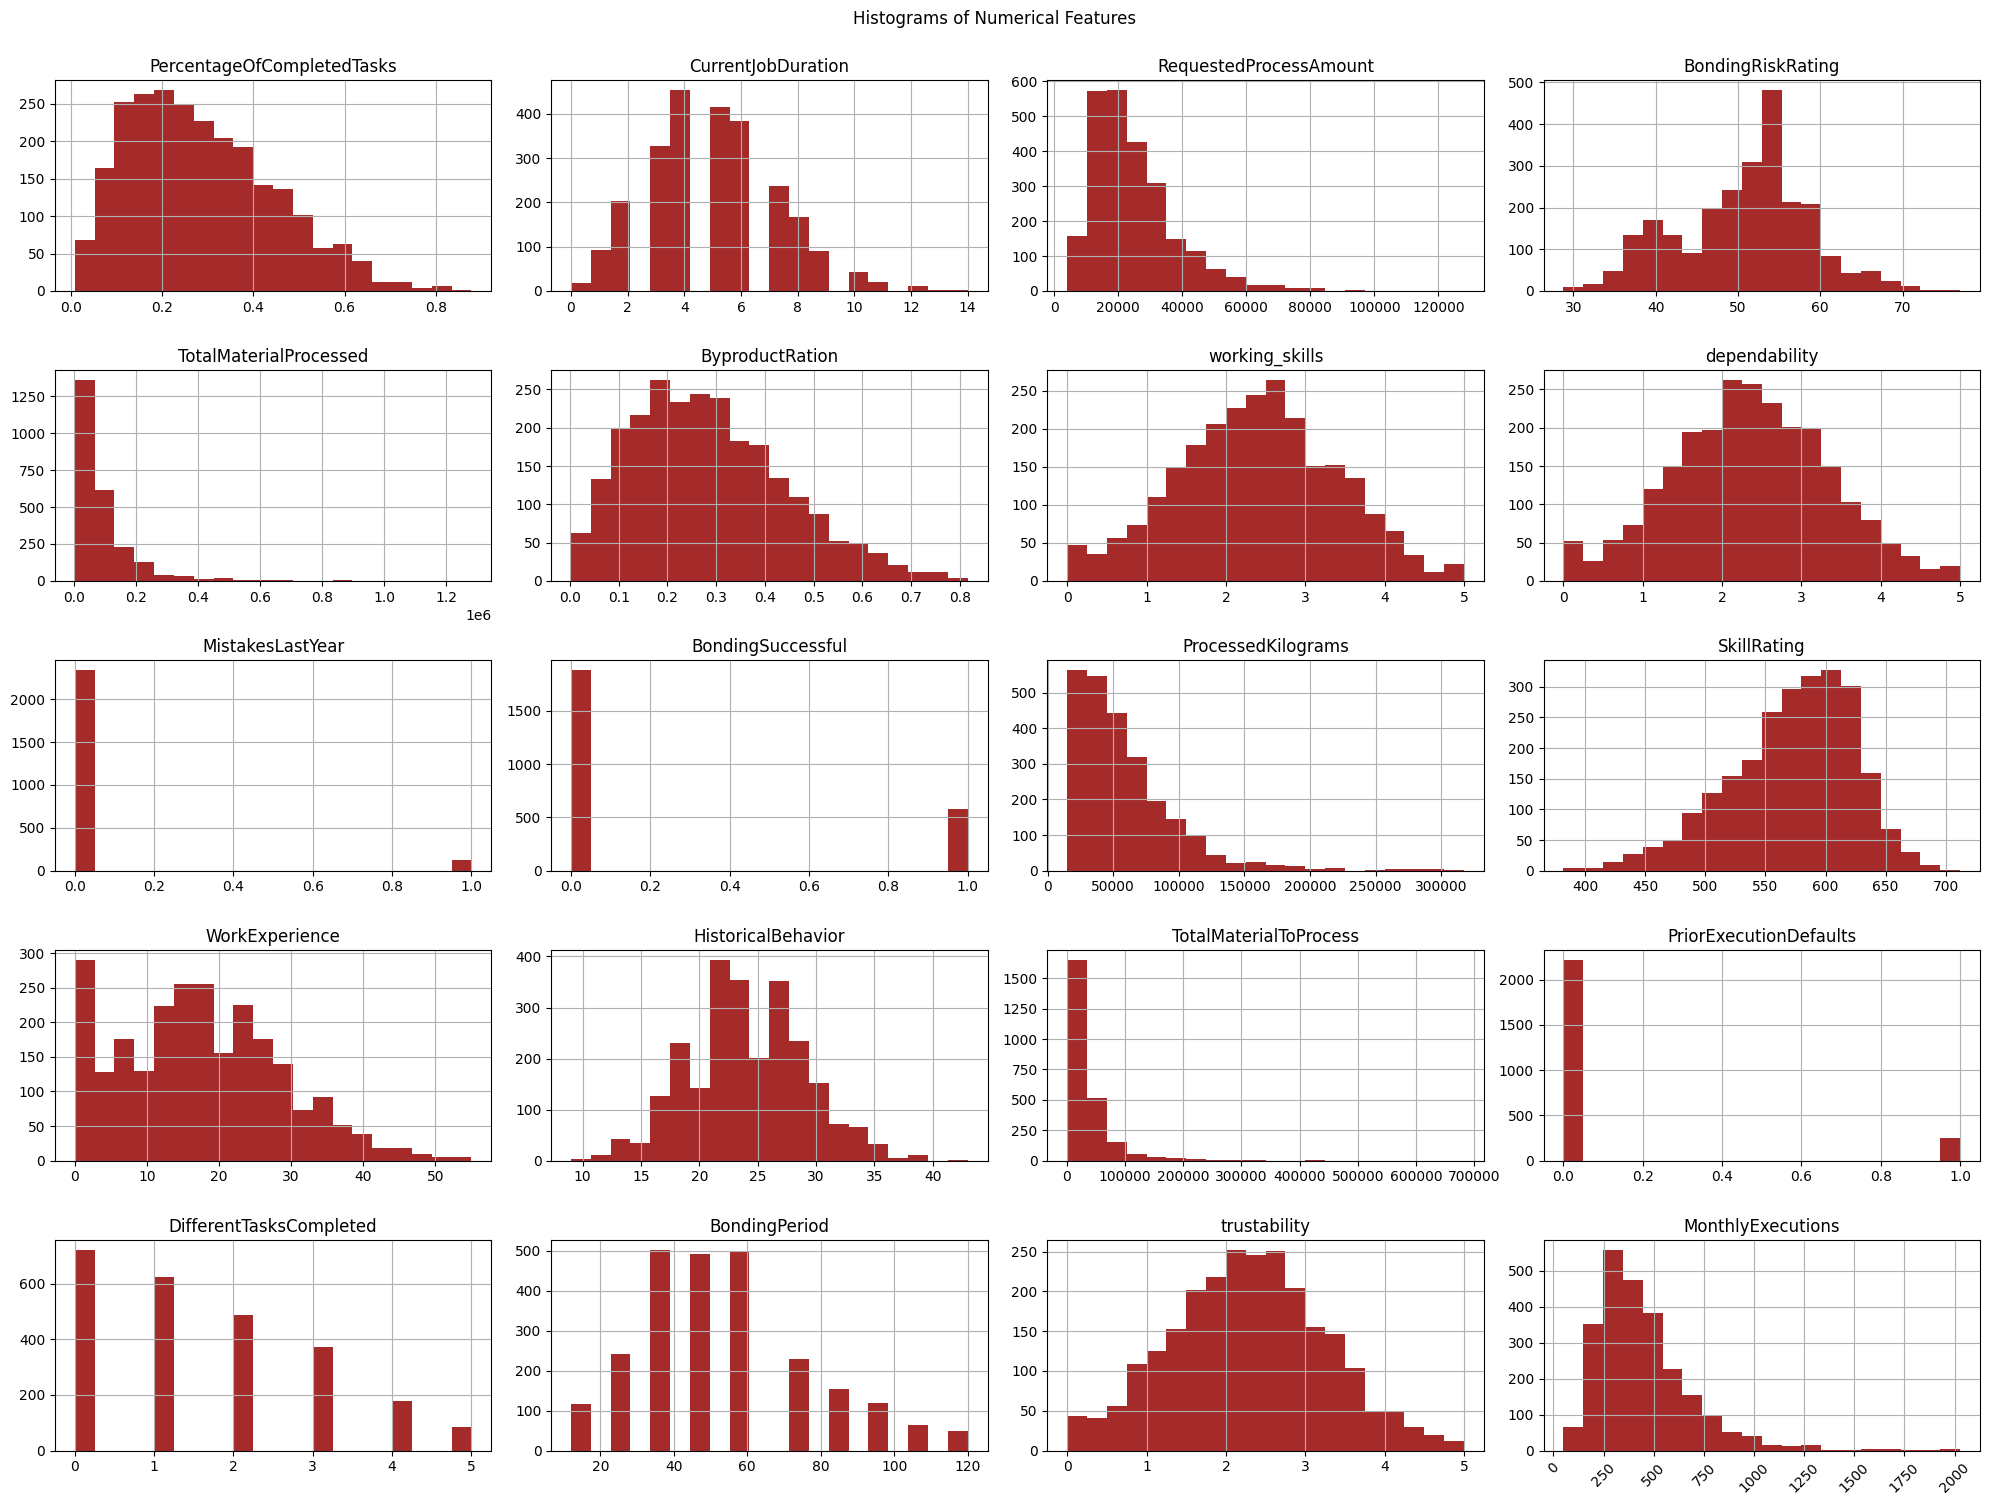

In [34]:
# Select numerical features (both int and float columns)
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numerical features
df[numerical_features].hist(bins=20, figsize=(20, 15), color='brown')

# Add a title for the entire plot
plt.suptitle('Histograms of Numerical Features', y=1)

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=45)

# Adjust layout to ensure labels are not cut off
plt.tight_layout()

# Save the plot as an image
plt.savefig('images/histograms.png')

# Display the plot
plt.show()

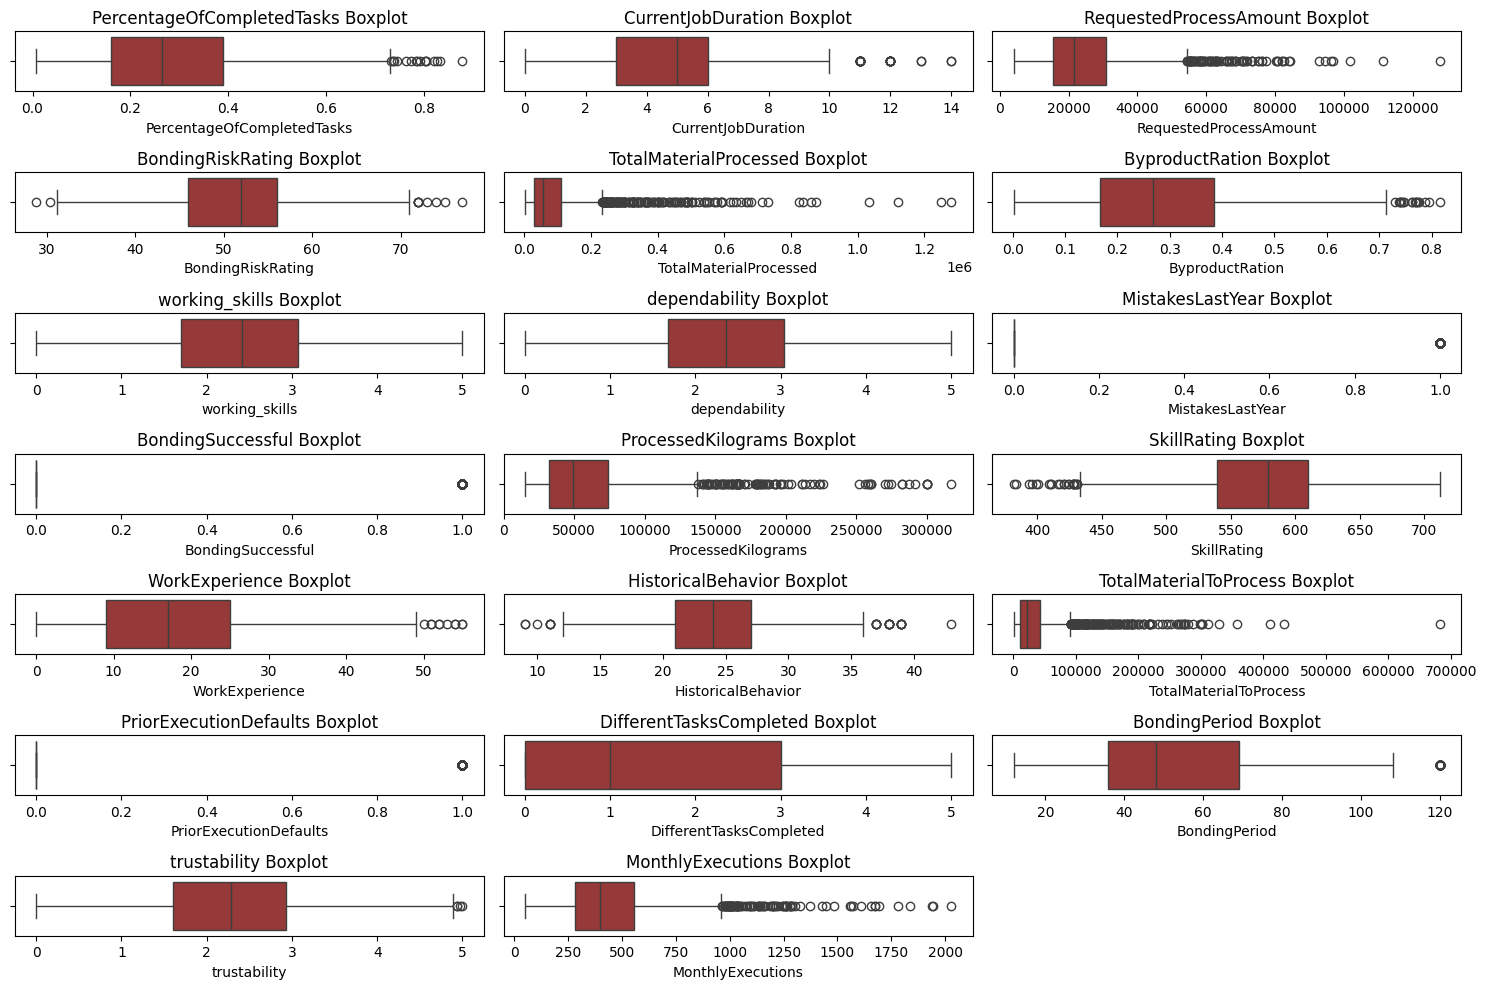

In [35]:
# Select numerical features (both int and float columns)
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Define the figure size and the number of rows and columns for subplots
fig, axs = plt.subplots(7, 3, figsize=(15, 10))
axs = axs.flatten()

# Loop through each numerical column and create a boxplot
for idx, col in enumerate(numerical_features):
    sns.boxplot(x=df[col], ax=axs[idx], color='brown')
    axs[idx].set_title(f'{col} Boxplot')

# Remove any unused subplots (if the number of features is less than 21)
for idx in range(len(numerical_features), len(axs)):
    fig.delaxes(axs[idx])

# Save the plot as an image
plt.savefig('images/boxplots.png')

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

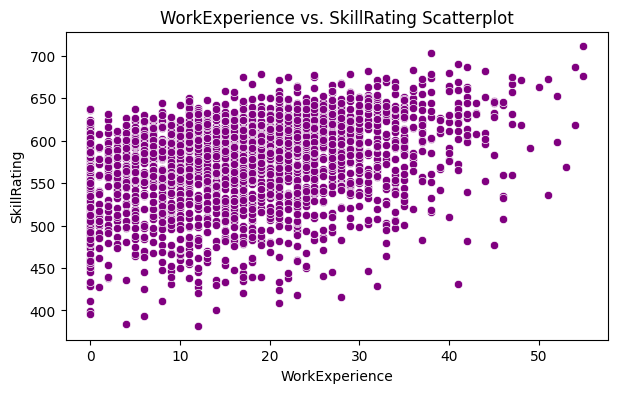

The correlation between WorkExperience and SkillRating is 0.36


In [39]:
# 2. Scatter Plot for WorkExperience vs. SkillRating
fig = plt.figure(figsize=(7,4))
sns.scatterplot(x=df['WorkExperience'], y=df['SkillRating'], color='purple')
plt.title('WorkExperience vs. SkillRating Scatterplot')
plt.savefig('images/scatterWorkExperience_vs_SkillRating.png')
plt.show()

# Correlation between WorkExperience and SkillRating
correlation_2 = df['WorkExperience'].corr(df['SkillRating'])
print(f'The correlation between WorkExperience and SkillRating is {correlation_2:.2f}')


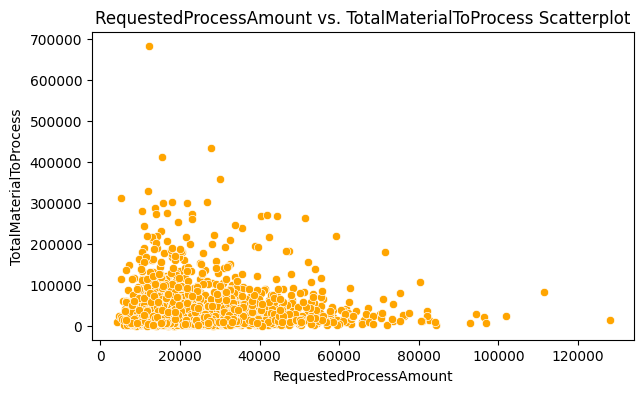

The correlation between RequestedProcessAmount and TotalMaterialToProcess is -0.04


In [48]:
# 8. Scatter Plot for RequestedProcessAmount vs. TotalMaterialToProcess
fig = plt.figure(figsize=(7,4))
sns.scatterplot(x=df['RequestedProcessAmount'], y=df['TotalMaterialToProcess'], color='orange')
plt.title('RequestedProcessAmount vs. TotalMaterialToProcess Scatterplot')
plt.savefig('images/scatterRequestedProcessAmount_vs_TotalMaterialToProcess.png')
plt.show()

# Correlation between RequestedProcessAmount and TotalMaterialToProcess
correlation_11 = df['RequestedProcessAmount'].corr(df['TotalMaterialToProcess'])
print(f'The correlation between RequestedProcessAmount and TotalMaterialToProcess is {correlation_11:.2f}')


# HERE NEED TO DO MORE OF THIS STUFF, MUCH MUCH MORE

C:\Users\WIN11\AppData\Local\Temp\ipykernel_17704\2008735098.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='BondingRiskRating', y='MistakesLastYear', ax=axes[0], palette='Set2')
C:\Users\WIN11\AppData\Local\Temp\ipykernel_17704\2008735098.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='MistakesLastYear', y='BondingRiskRating', ax=axes[1], palette='Set2')


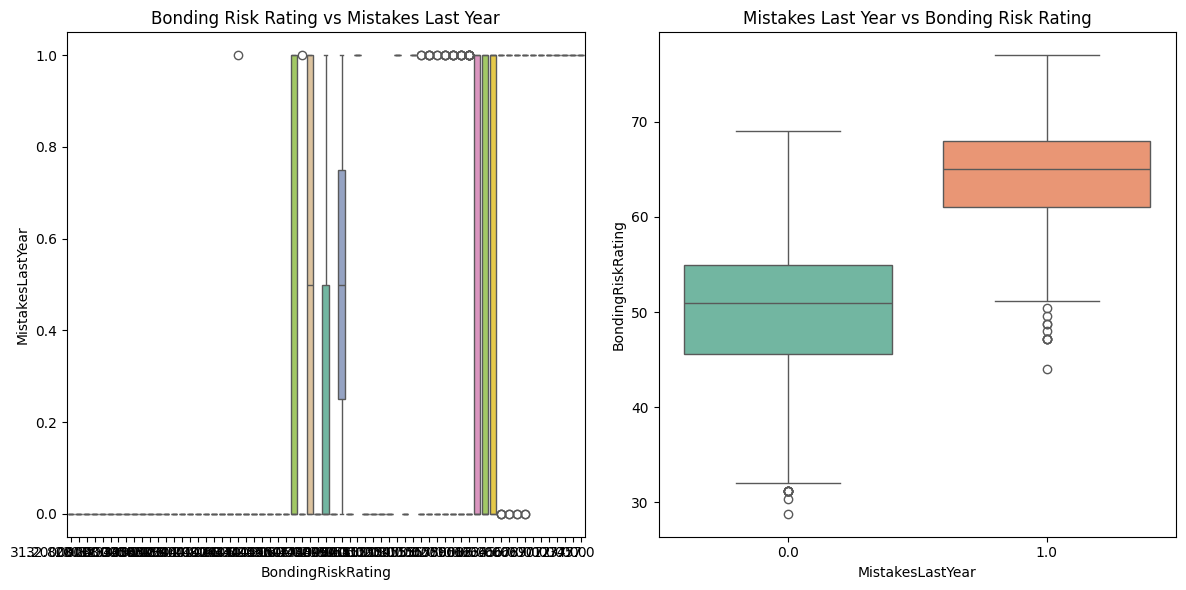

In [50]:
# Set the figure size
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the boxplot for BondingRiskRating
sns.boxplot(data=df, x='BondingRiskRating', y='MistakesLastYear', ax=axes[0], palette='Set2')
axes[0].set_title('Bonding Risk Rating vs Mistakes Last Year')

# Plot the boxplot for MistakesLastYear grouped by BondingRiskRating
sns.boxplot(data=df, x='MistakesLastYear', y='BondingRiskRating', ax=axes[1], palette='Set2')
axes[1].set_title('Mistakes Last Year vs Bonding Risk Rating')

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('images/bondingRiskRating_vs_mistakesLastYear.png')
plt.show()